In [1]:
#import data manipulation libraries
import numpy as np
import pandas as pd

#import data visualziation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import logging 
import logging
logging.basicConfig(filename='model.log',
                    level=logging.INFO,
                    filemode='w',
                      format='%(asctime)s:%(levelname)s:%(message)s',
                      force=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#data import using pandas function
url="https://raw.githubusercontent.com/Frisk516/Energy_consumption_MLModel/refs/heads/main/test_energy_data.csv"
df=pd.read_csv(url,sep=',')
#shuffle the dataset
df.sample(frac=1)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
91,Residential,33642,66,11,16.89,Weekend,3977.63
37,Industrial,29331,8,1,31.71,Weekend,3908.00
24,Industrial,42767,40,28,17.94,Weekend,5508.64
59,Residential,11498,70,12,28.57,Weekend,2872.05
71,Industrial,17868,68,35,10.40,Weekend,4721.39
...,...,...,...,...,...,...,...
16,Industrial,27165,73,25,30.15,Weekday,4987.52
73,Commercial,26715,27,46,13.11,Weekday,4510.20
65,Industrial,28465,71,46,21.45,Weekend,5446.00
62,Residential,21408,73,20,27.59,Weekend,3562.43


In [3]:
logging.info("Data imported successfully")

In [4]:
#separating numerical and categorical data
numerical_data=df.select_dtypes(exclude=object)
categorial_data=df.select_dtypes(include=object)

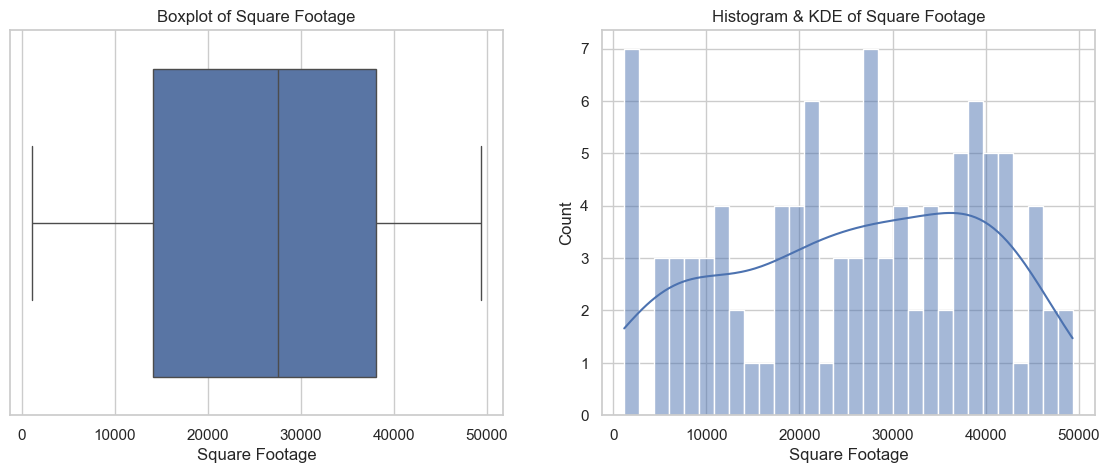

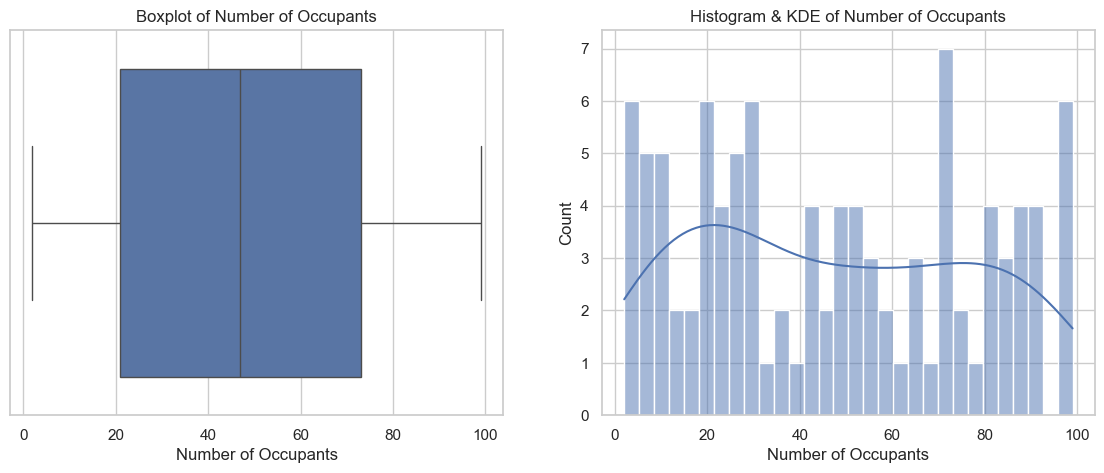

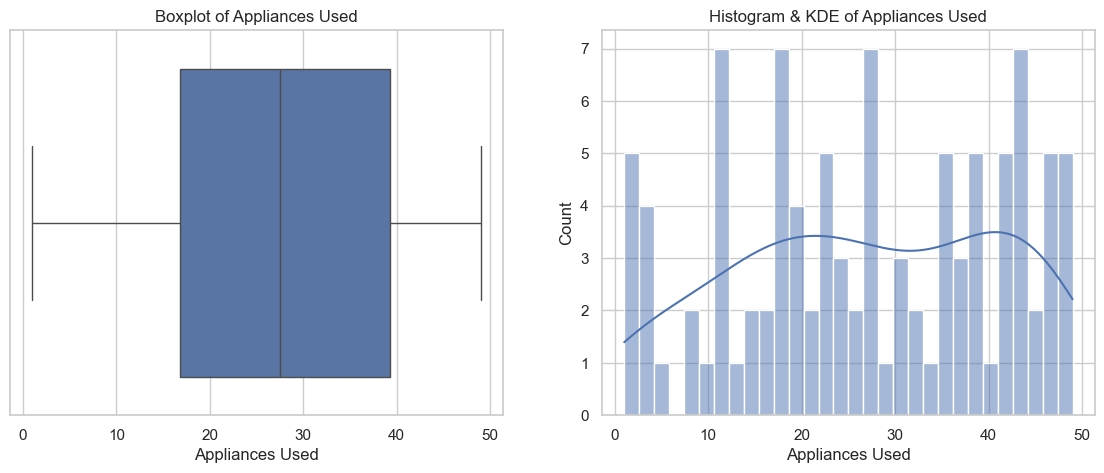

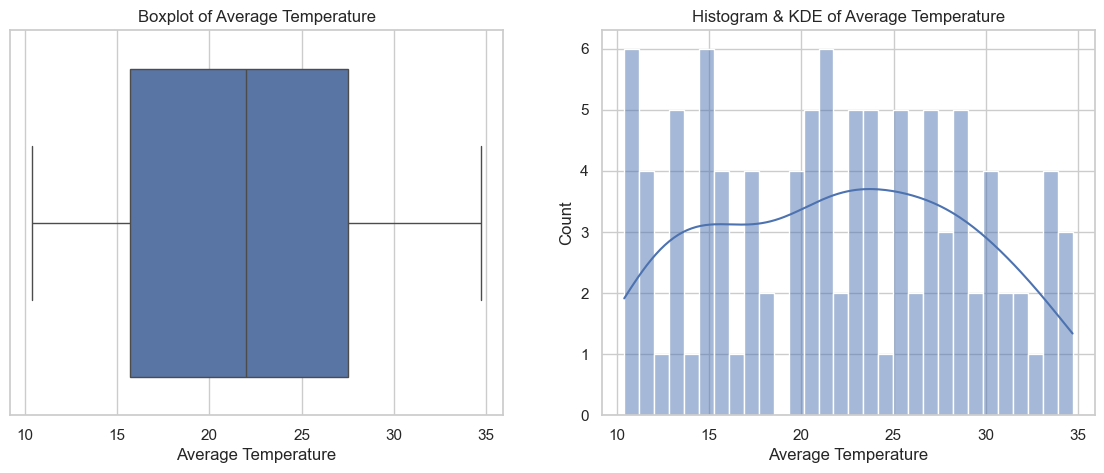

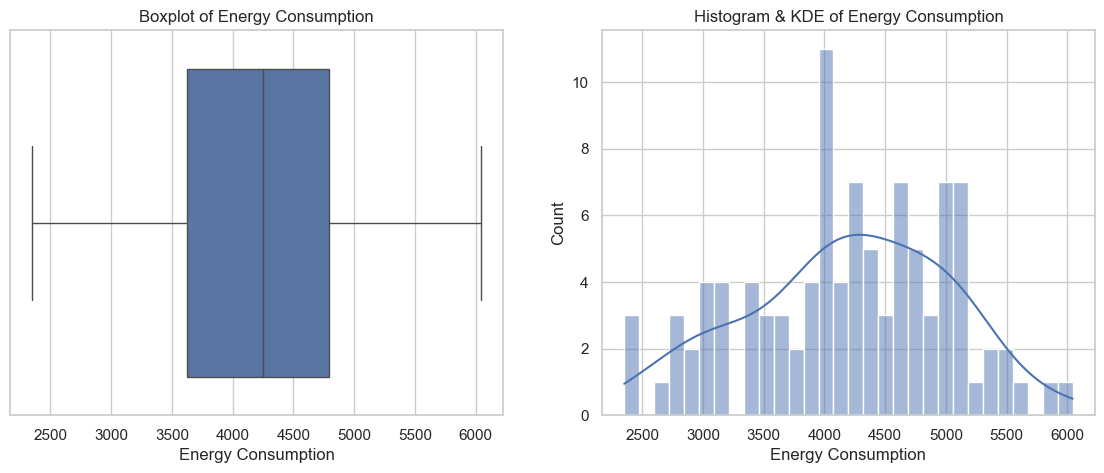

In [5]:
# Set plot style
sns.set(style="whitegrid")

# Plot boxplots and bell curves for each numerical feature
for col in numerical_data.columns:
    plt.figure(figsize=(14, 5))
    
    # Boxplot (shows outliers as points beyond whiskers)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    # Bell curve: histogram + KDE (to check distribution shape)
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')
    
    plt.show()

In [6]:
#performing EDA

from collections import OrderedDict
stats=[]
for i in numerical_data:
    numerical_stats=OrderedDict({
        'feature':i,
        'mean':df[i].mean(),
        'median':df[i].median(),
        'mode':df[i].mode()[0],
        'std':df[i].std(),
        'min':df[i].min(),
        'max':df[i].max(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report=pd.DataFrame(stats)


# Outlier Identification :
outlier_label = []
for col in report['feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,feature,mean,median,mode,std,min,max,skewness,kurtosis,Outlier Comment
0,Square Footage,25881.9200,27582.50,38141.00,13711.075264,1161.00,49354.00,-0.218762,-1.101355,No Outliers
1,Number of Occupants,47.2300,47.00,27.00,29.905526,2.00,99.00,0.159334,-1.286767,No Outliers
2,Appliances Used,26.9700,27.50,17.00,14.237846,1.00,49.00,-0.150855,-1.130198,No Outliers
3,Average Temperature,22.0433,21.97,10.40,6.957951,10.40,34.71,0.007284,-1.089759,No Outliers
4,Energy Consumption,4187.5783,4249.39,2351.97,832.559850,2351.97,6042.56,-0.242143,-0.513768,No Outliers


In [7]:
#the data seems to have no outliers


In [8]:
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [9]:
#the data is non-normally distributed
logging.info("The data is non-normally distributed")

In [10]:
#encoding building type and day of the week with label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Building Type']=le.fit_transform(df['Building Type'])
df['Day of Week']=le.fit_transform(df['Day of Week'])
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,24563,15,4,28.52,0,2865.57
1,0,27583,56,23,23.07,1,4283.80
2,0,45313,4,44,33.56,0,5067.83
3,2,41625,84,17,27.39,1,4624.30
4,2,36720,58,47,17.08,0,4820.59


In [11]:
#dividing the dataset to prevent data leakage
X=df.drop(columns='Energy Consumption')
y=df['Energy Consumption']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#the dataset has no outliers
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train



array([[-0.13647824,  0.10670982,  0.88296713,  1.41825557, -0.18175961,
         0.97182532],
       [-0.13647824, -1.43161957, -0.04106824, -0.52700749, -1.13861567,
        -1.02899151],
       [-1.33066283,  1.24188834, -0.52019769, -1.43016535,  0.20413886,
         0.97182532],
       [-1.33066283,  0.97506243, -0.48597416, -0.45753381, -1.53599067,
        -1.02899151],
       [-1.33066283, -0.50725581, -0.62286829, -0.59648118, -0.48588777,
         0.97182532],
       [ 1.05770635,  0.80242729,  1.53321424, -1.01332326, -0.4414162 ,
         0.97182532],
       [ 1.05770635,  1.325222  , -1.1704448 , -0.31858645,  1.25280718,
        -1.02899151],
       [-1.33066283, -0.07591961,  1.73855544,  1.00141349,  0.60007929,
         0.97182532],
       [-1.33066283,  1.60865713,  1.32787305,  0.86246613, -1.1027515 ,
        -1.02899151],
       [-0.13647824, -1.51516894,  0.13004942,  1.62667662,  1.38909103,
         0.97182532],
       [ 1.05770635, -0.40069801,  0.9514142 , -0.

In [12]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

LR.fit(X_train,y_train)

y_pred_LR=LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR=r2_score(y_test,y_pred_LR)
r2_score_LR

0.6862070177736088

In [13]:
#linear regression gave low r2 score
logging.info("linear regression gave low r2 score")

In [14]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()

RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)

r2_score_RF = r2_score(y_test,y_pred_RF)
print(f'The R2 Score for ',r2_score_RF)

The R2 Score for  0.7680349680897999


In [15]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor()

DT.fit(X_train,y_train)

y_pred_DT=DT.predict(X_test)

r2_score_DT=r2_score(y_test,y_pred_DT)
r2_score_DT

0.15366901861527027

In [16]:
#Using XGB Bossting Algorithm

import xgboost as xgb

XGB = xgb.XGBRegressor()

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)

r2_score_XGB = r2_score(y_test, y_pred_XGB)

print(f'The R2 Score for XGBoost Model: {r2_score_XGB}')

The R2 Score for XGBoost Model: 0.8784379633367171


In [17]:
from sklearn.ensemble import AdaBoostRegressor
ADA=AdaBoostRegressor()

ADA.fit(X_train, y_train)

y_pred_ADA = ADA.predict(X_test)

r2_score_ADA = r2_score(y_test, y_pred_ADA)

print(f'The R2 Score for AdaBoost Model: {r2_score_ADA}')

The R2 Score for AdaBoost Model: 0.7986851736056638


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model and parameter grid
model=RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [25,50,100, 200, 300, 400,500,600,700,800],'max_depth': [None, 10,20,30,40,50]}

#Grid Search Cv
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

#print result
print('Best Parameters:', grid_search.best_params_)
print('R2 Score:', r2_score(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'n_estimators': 25}
R2 Score: 0.8213456141237833


In [19]:
logging.info("after checking various algorithms,XGboost gave the best r2 score")